# <p style="text-align: center;">Bike Sharing Assignment</p>

## Problem Statemment
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. 

Boom Bike is provides users such a bike sharing system. Due to recent covid lockdown it suffered dip in its revenue.So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.  Therefore BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits. To achive this goal they want to determine the factors which controls the demand of bike sharing from the historical data .

## Business Goal
 
To determine the variable which controls the demand for the bike sharing . These variable can be used  to create  machine learning model which can help them to strtegize their business plan providing advance predictions such as

1. When to provide more bikes for sharing
2. When to reduce the number of bikes avaiable to reduce maintenance cost




 




## Step 1: Understand Data, Clean Data

In [599]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

### Step 1.1: Read and Check Data

In [600]:
bikes=pd.read_csv("day.csv")
print(bikes.shape)

(730, 16)


In [601]:
pd.set_option('display.max_columns',16)
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [602]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [603]:
bikes.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

- There is no rows will null values
- No rows are duplicated

### Step 1.2 Drop unnecessary columns
- instant is just index. it wont affect the outcome. So it can be dropped
- dteday is already synthesized into yr,mnth,weekday features. So this too can be dropped
- There 3 depndent variables, cnt, casual, and registered. However cnt is sum of regsitered and casual variable. Also the business objective to see how features after affecting overall demand whihc can be explained by cnt. So we can drop casual and registered

In [604]:
bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [605]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB



- All  columns are in int64 or float64 format

In [606]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Step 1.3 Identify numerical and Categorical Variables

In [607]:
bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [608]:
cat_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit']
num_vars=['temp','atemp','hum','windspeed','cnt']


### Step 1.4 Data Cleaning¶

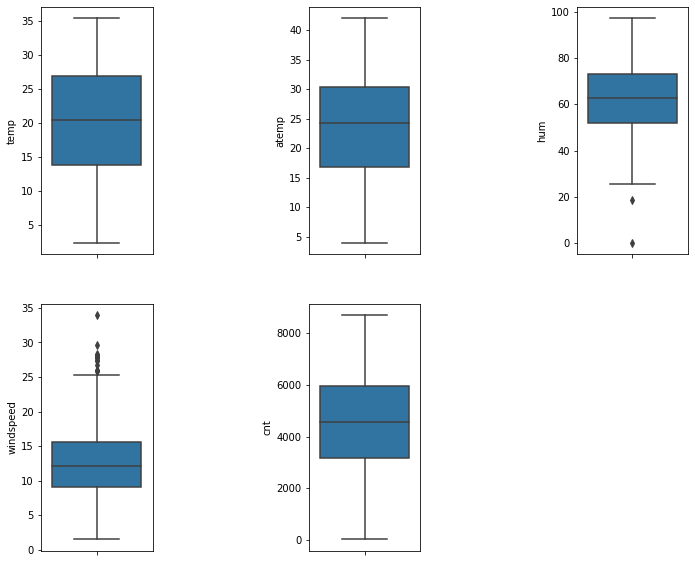

In [609]:
plt.figure(figsize=(14,10))
i=1
for var in num_vars:
    plt.subplot(2,6,i)
    sns.boxplot(y=bikes[var])
    i=i+2
plt.show()

In [610]:

print(bikes['windspeed'].quantile(0.99))
                                  

27.380947620000004


In [611]:
bikes=bikes[bikes['windspeed'] < 28]

<AxesSubplot:>

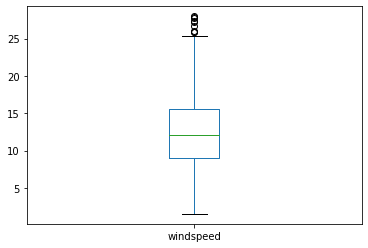

In [612]:
bikes.windspeed.plot.box()

In [613]:
bikes.shape

(726, 12)

In [614]:
bikes.hum.quantile(0.01)

31.421225

In [615]:
bikes=bikes[bikes.hum > 31]


<AxesSubplot:>

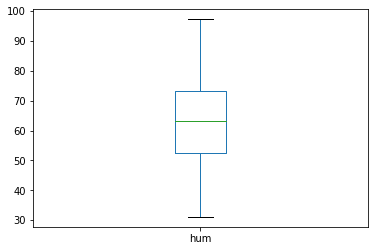

In [616]:
bikes.hum.plot.box()

In [617]:
bikes.shape

(720, 12)


- Humidity and Windspeed have some outliers . They are removed

#### Check categorical variables for outliers 

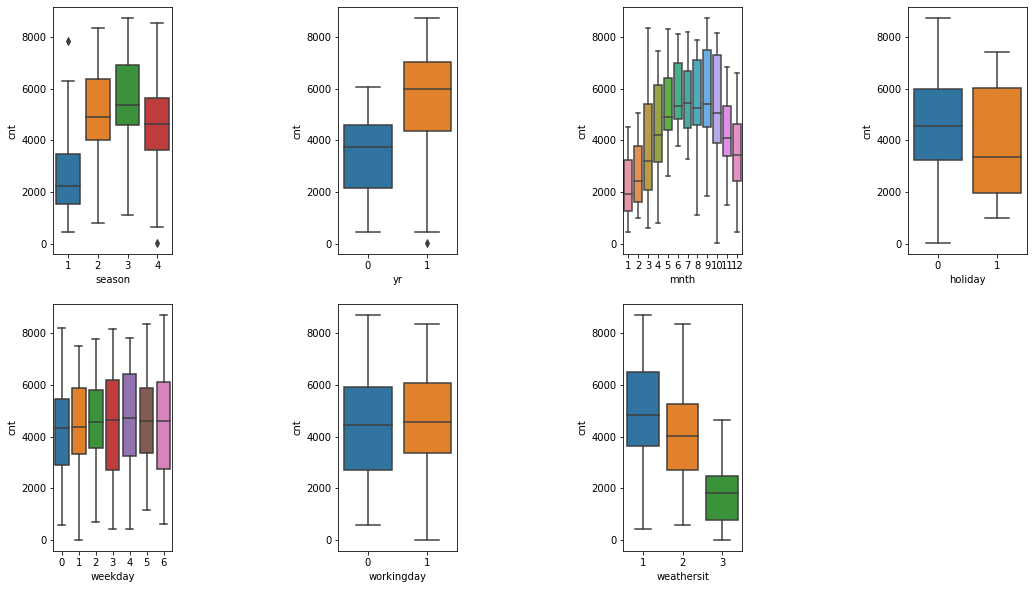

In [618]:
plt.figure(figsize=(20,10))
i=1
for var in cat_vars:
    plt.subplot(2,8,i)
    sns.boxplot(x=bikes[var],y=bikes['cnt'])
    i=i+2
plt.show()

- Theare are hardly any outliers in categorical variables with respect to cnt.
- So keeping all the remaining rows intact

## Step 2. EDA

<Figure size 1440x1440 with 0 Axes>

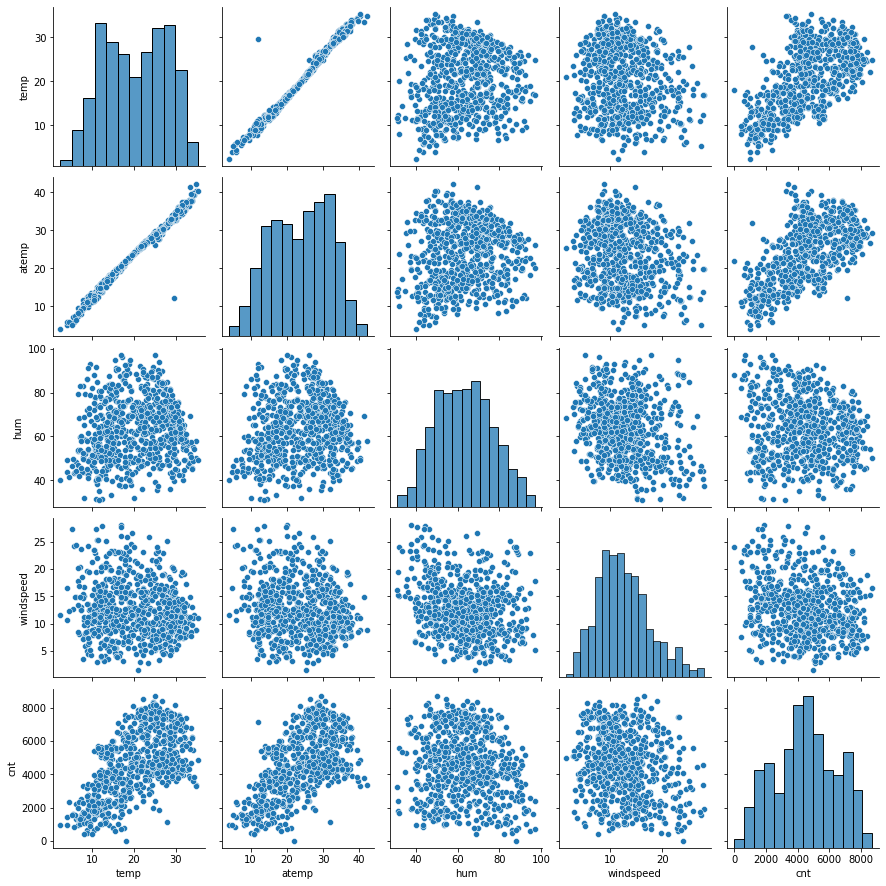

In [619]:
plt.figure(figsize=(20,20))
sns.pairplot(data=bikes,x_vars=bikes[num_vars],y_vars=bikes[num_vars])
plt.show()

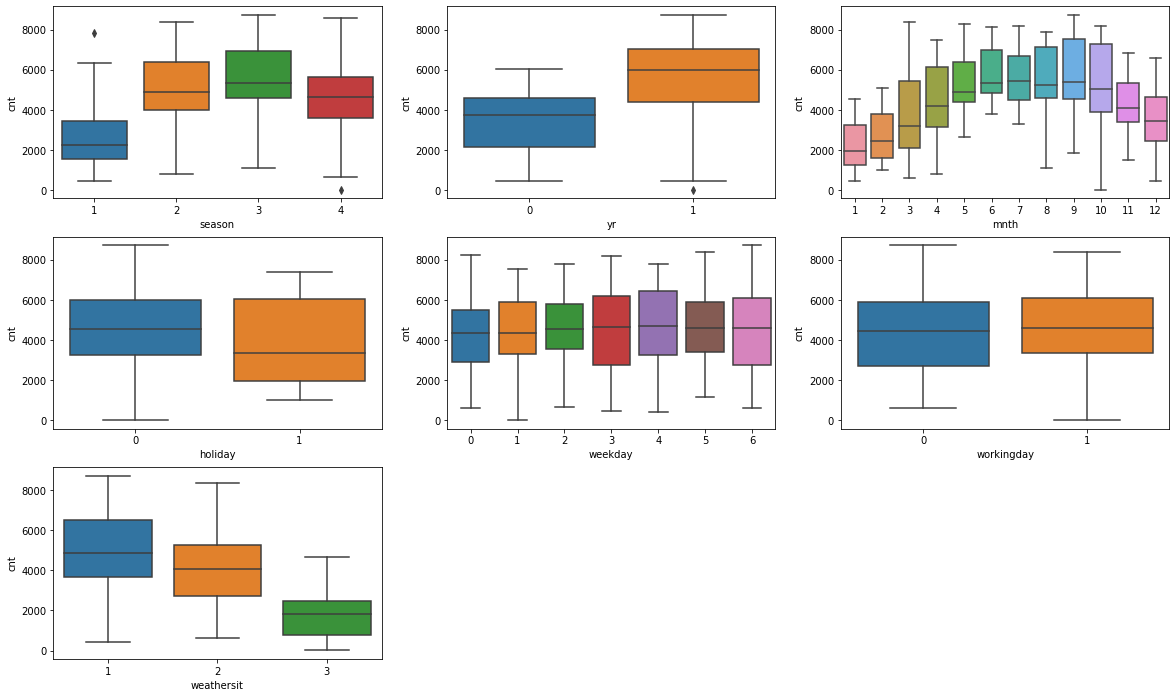

In [620]:
plt.figure(figsize=(20,12))
i=1
for var in cat_vars:
    plt.subplot(3,3,i)
    sns.boxplot(x=bikes[var],y=bikes['cnt'])
    i=i+1
plt.show()

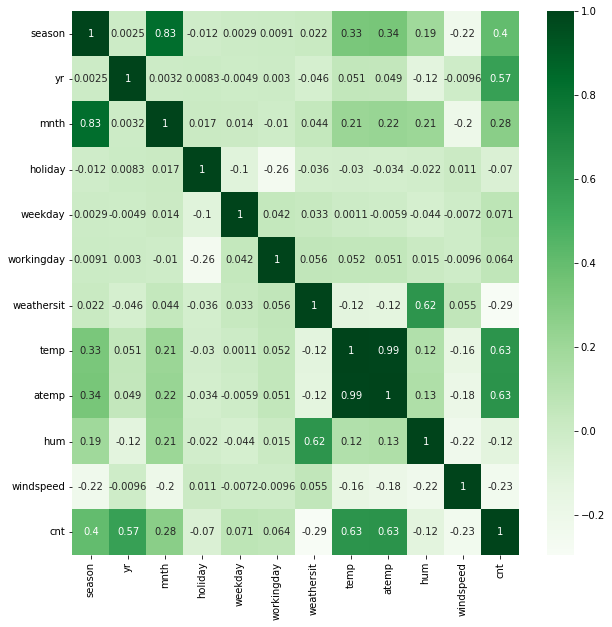

In [621]:
plt.figure(figsize=(10,10))
sns.heatmap(bikes.corr(),cmap='Greens',annot=True)
plt.show()

### Obesrvation from EDA
- cnt increase linearly with 'temp' . Also there more data points in the higher temp zone. This shows there is demand for bike sharing daay temperature is towards higher range
- Similar observation is there for 'atemp'
- temp and atemp is highly related (0.99)
- There is no clear relation between 'hum' an 'cnt'. But thre are more data points for the days when humidiy is more.
-There is no clear relation between 'windspeed' an 'cnt'. But there are more data points for the days when windspeed is less.
- Bike sharing demand increasing year on year
- Weather situation greatly impact bike demand. When the weather situation is 1 (Sunny, clear sky) the demand is more . When the weather sitation is 3(i.e Light rain) demand drops.
- There is drop in bike dmand if there is a holiday
- There is more demand for bike from month 5 to 10 (i.e May to October). Peak occurs in the month 9 (i.e September)
- There is more demand for bike in season 3(i.e Fall). There is less demand for bike in season 1(i.e Spring)

## Step 3. Model Buidling


### Step 3.1 Dropping columns based on EDA

- From EDA it is clear temp and atemp is highly corrleated. So dropping atemp

In [622]:
bikes.drop('atemp',axis=1,inplace=True)

- instant ,dteday, dropped as they are not valid variables for analysis
- casual and registered columns are not independent variables. also they are related directly to 'cnt' variables cnt=casual+registered. So they too are dropped

In [623]:
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [624]:
num_vars=['temp',  'hum', 'windspeed']

In [625]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Step 3.2 Create Dummy variable for categorical varaibles

- Make categorical variable more readable for analysis

In [626]:
bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['weathersit'] = bikes['weathersit'].map({1: "clear-sky", 2: "misty", 3: "light", 4: "heavy"})
bikes['mnth'] = bikes['mnth'].map({1: "jan", 2: "feb", 3: "mar", 4: "apr", 5: "may", 6: "june", 7: "july", 8: "aug", 9: "sept", 10 : "oct", 11: "nov", 12: 'dec'})
bikes['weekday'] = bikes['weekday'].map({0: "sun", 1: "mon", 2: "tue", 3: "wed", 4: "thu", 5: "fri", 6: "sat"})

In [627]:
bikes_with_dummies=bikes
for cat in cat_vars:
    dummies=pd.get_dummies(bikes[cat],prefix=cat,drop_first=True)
    bikes_with_dummies=pd.concat([bikes_with_dummies,dummies],axis=1)
pd.set_option('display.max_columns', 50)
bikes_with_dummies.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
0,spring,0,jan,0,sat,0,misty,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,misty,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear-sky,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear-sky,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,clear-sky,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [630]:

bikes_with_dummies.drop(cat_vars,axis=1,inplace=True)
bikes_data.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [631]:
bikes_data.shape

(720, 29)

- Dummy variables created and corresponding categorical variables dropped

In [632]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Step 3.3 Split train and test data (use ration 70:30)

In [633]:
bikes_train,bikes_test=train_test_split(bikes_data,train_size=0.7,test_size = 0.30, random_state=100)

In [634]:
print(bikes_train.shape)
print(bikes_test.shape)

(503, 29)
(216, 29)


### Step 3.4 Scaling and Normalizing data, Preparing Feature and target data for training

In [635]:
bikes_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,20.174324,64.023739,12.406091,4492.807157,0.238569,0.242545,0.252485,0.504970,0.089463,0.091451,0.071571,0.083499,0.081511,0.069583,0.083499,0.087475,0.091451,0.081511,0.089463,0.031809,0.155070,0.145129,0.137177,0.141153,0.141153,0.147117,0.685885,0.025845,0.369781
std,7.462497,13.890668,5.013312,1988.217896,0.426633,0.429049,0.434870,0.500473,0.285695,0.288537,0.258032,0.276910,0.273891,0.254695,0.276910,0.282811,0.288537,0.273891,0.285695,0.175666,0.362331,0.352582,0.344377,0.348526,0.348526,0.354575,0.464625,0.158830,0.483226
min,2.424346,31.416700,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.632500,53.625000,8.791941,3029.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.158347,64.208300,11.707982,4539.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.786653,73.791650,15.312984,6048.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,34.815847,97.250000,27.833743,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [636]:
num_vars = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.547983,0.495297,0.414143,0.514359,0.238569,0.242545,0.252485,0.504970,0.089463,0.091451,0.071571,0.083499,0.081511,0.069583,0.083499,0.087475,0.091451,0.081511,0.089463,0.031809,0.155070,0.145129,0.137177,0.141153,0.141153,0.147117,0.685885,0.025845,0.369781
std,0.230384,0.210998,0.190378,0.228741,0.426633,0.429049,0.434870,0.500473,0.285695,0.288537,0.258032,0.276910,0.273891,0.254695,0.276910,0.282811,0.288537,0.273891,0.285695,0.175666,0.362331,0.352582,0.344377,0.348526,0.348526,0.354575,0.464625,0.158830,0.483226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346021,0.337341,0.276898,0.345950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.547489,0.498101,0.387633,0.519673,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.752120,0.643670,0.524531,0.693281,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [637]:
bikes_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,503.000000,503.000000,503.000000,503.000000
mean,0.547983,0.495297,0.414143,0.514359
std,0.230384,0.210998,0.190378,0.228741
min,0.000000,0.000000,0.000000,0.000000
25%,0.346021,0.337341,0.276898,0.345950
50%,0.547489,0.498101,0.387633,0.519673
75%,0.752120,0.643670,0.524531,0.693281
max,1.000000,1.000000,1.000000,1.000000


In [638]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

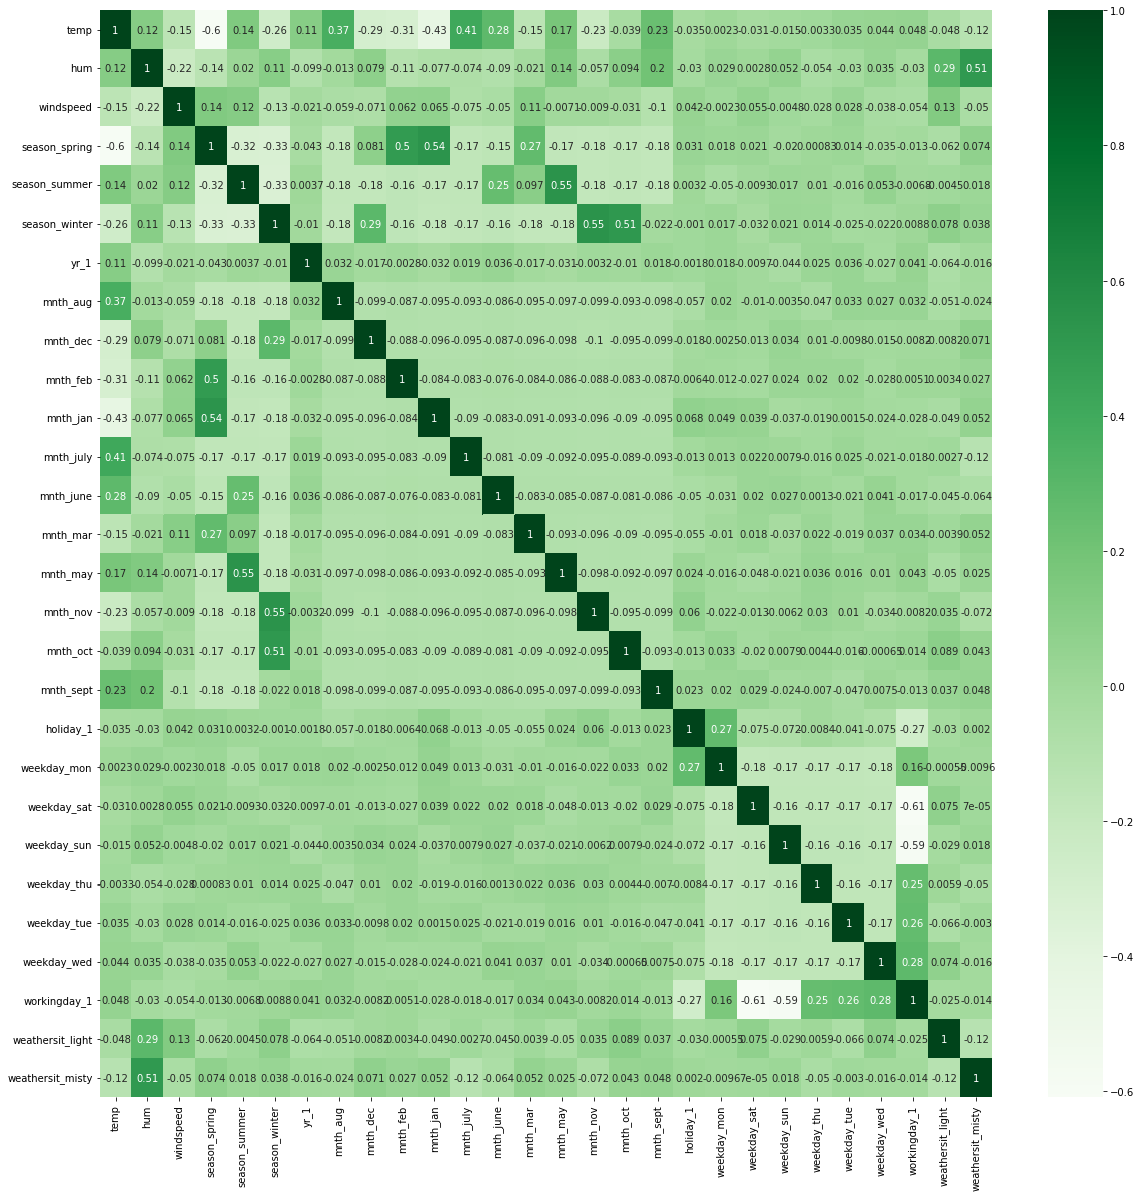

In [639]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),cmap='Greens',annot=True)
plt.show()

### Step 3.5 Build  model with all features to analyze

In [640]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X_train): 
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values('VIF',ascending=False)
    print(vif)

In [641]:
def build_and_check_model(x_train):   
    x_train_sm=sm.add_constant(x_train)
    model=sm.OLS(y_train,x_train_sm).fit()
    print(model.summary())
    calculate_vif(x_train)
    return model

In [642]:
model_all=build_and_check_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     97.79
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          5.31e-175
Time:                        01:13:52   Log-Likelihood:                 501.80
No. Observations:                 503   AIC:                            -947.6
Df Residuals:                     475   BIC:                            -829.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2412      0.036  

### Observation
- 17 Variables are having p value > 0.05
- 15 varaibles are having VIF > 5

### Step 3.6 Create base model with sklearn RFE method
- Prioritize 20 Variables 

In [643]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
423,0.379776,0.124050,0.435138,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
728,0.248979,0.256961,0.835448,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,0.401926,0.266455,0.273723,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
114,0.693052,0.702532,0.414570,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
582,0.877642,0.516456,0.272143,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [644]:
X_train.describe()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.547983,0.495297,0.414143,0.238569,0.242545,0.252485,0.504970,0.089463,0.091451,0.071571,0.083499,0.081511,0.069583,0.083499,0.087475,0.091451,0.081511,0.089463,0.031809,0.155070,0.145129,0.137177,0.141153,0.141153,0.147117,0.685885,0.025845,0.369781
std,0.230384,0.210998,0.190378,0.426633,0.429049,0.434870,0.500473,0.285695,0.288537,0.258032,0.276910,0.273891,0.254695,0.276910,0.282811,0.288537,0.273891,0.285695,0.175666,0.362331,0.352582,0.344377,0.348526,0.348526,0.354575,0.464625,0.158830,0.483226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346021,0.337341,0.276898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.547489,0.498101,0.387633,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.752120,0.643670,0.524531,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [645]:
y_train.describe()

count    503.000000
mean       0.514359
std        0.228741
min        0.000000
25%        0.345950
50%        0.519673
75%        0.693281
max        1.000000
Name: cnt, dtype: float64

In [646]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,20)
rfe=rfe.fit(X_train,y_train)
t=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
list(t)


[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 7),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 9),
 ('mnth_sept', True, 1),
 ('holiday_1', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 6),
 ('weekday_tue', False, 4),
 ('weekday_wed', False, 5),
 ('workingday_1', True, 1),
 ('weathersit_light', True, 1),
 ('weathersit_misty', True, 1)]

In [647]:
vars=[]
[vars.append(t[i][0]) if t[i][1]==True else 'x' for i in range(len(t))]
X_train_rfe=X_train[vars]
model_rfe=build_and_check_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     132.4
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          3.15e-181
Time:                        01:14:29   Log-Likelihood:                 499.29
No. Observations:                 503   AIC:                            -956.6
Df Residuals:                     482   BIC:                            -868.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2835      0.038  

In [648]:
X_train_2=X_train_rfe.drop('mnth_feb',axis=1)
model_2=build_and_check_model(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     139.5
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          3.29e-182
Time:                        01:14:50   Log-Likelihood:                 499.06
No. Observations:                 503   AIC:                            -958.1
Df Residuals:                     483   BIC:                            -873.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2755      0.036  

In [649]:
X_train_3=X_train_2.drop('mnth_may',axis=1)
model_3=build_and_check_model(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          6.06e-183
Time:                        01:15:03   Log-Likelihood:                 498.20
No. Observations:                 503   AIC:                            -958.4
Df Residuals:                     484   BIC:                            -878.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2665      0.035  

In [650]:
X_train_4=X_train_3.drop('mnth_jan',axis=1)
model_4=build_and_check_model(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     155.1
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          1.47e-183
Time:                        01:15:23   Log-Likelihood:                 497.03
No. Observations:                 503   AIC:                            -958.1
Df Residuals:                     485   BIC:                            -882.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2543      0.034  

In [651]:
X_train_5=X_train_4.drop('mnth_july',axis=1)
model_5=build_and_check_model(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     164.0
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.21e-184
Time:                        01:15:54   Log-Likelihood:                 495.66
No. Observations:                 503   AIC:                            -957.3
Df Residuals:                     486   BIC:                            -885.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2474      0.034  

In [652]:
X_train_6=X_train_5.drop('mnth_dec',axis=1)
model_6=build_and_check_model(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     173.9
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          1.66e-184
Time:                        01:16:30   Log-Likelihood:                 493.92
No. Observations:                 503   AIC:                            -955.8
Df Residuals:                     487   BIC:                            -888.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2349      0.034  

In [653]:
X_train_7=X_train_6.drop('hum',axis=1)
model_7=build_and_check_model(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          6.19e-179
Time:                        01:16:40   Log-Likelihood:                 477.91
No. Observations:                 503   AIC:                            -925.8
Df Residuals:                     488   BIC:                            -862.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1880      0.034  

In [654]:
X_train_8=X_train_7.drop('holiday_1',axis=1)
model_8=build_and_check_model(X_train_8)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          2.83e-179
Time:                        01:16:49   Log-Likelihood:                 475.99
No. Observations:                 503   AIC:                            -924.0
Df Residuals:                     489   BIC:                            -864.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1810      0.033  

<AxesSubplot:>

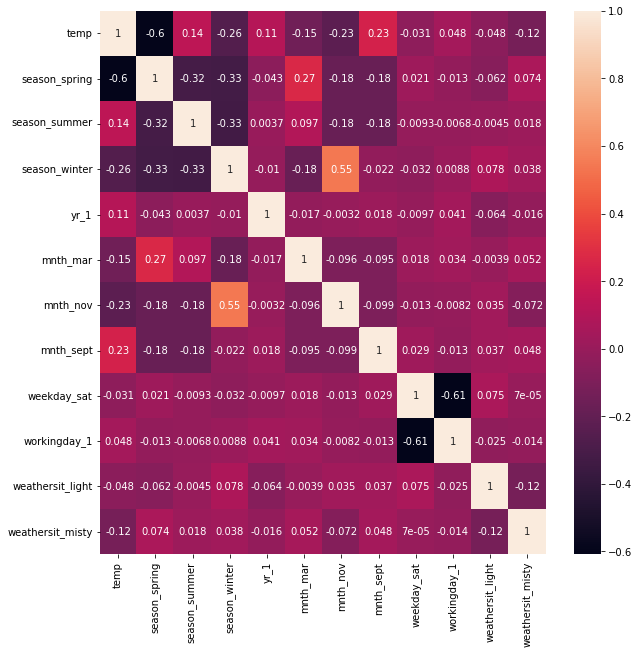

In [663]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_9.corr(),annot=True)

In [655]:
X_train_9=X_train_8.drop('windspeed',axis=1)
model_9=build_and_check_model(X_train_9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     188.8
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          4.95e-175
Time:                        01:17:44   Log-Likelihood:                 463.17
No. Observations:                 503   AIC:                            -900.3
Df Residuals:                     490   BIC:                            -845.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1223      0.032  

In [665]:
X_train_10=X_train_9.drop('season_summer',axis=1)
model_10=build_and_check_model(X_train_10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     203.5
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          5.80e-175
Time:                        01:21:52   Log-Likelihood:                 460.24
No. Observations:                 503   AIC:                            -896.5
Df Residuals:                     491   BIC:                            -845.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1707      0.025  

In [679]:
X_train_11=X_train_10.drop('mnth_mar',axis=1)
model_11=build_and_check_model(X_train_11)  

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     220.1
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          1.74e-174
Time:                        01:24:17   Log-Likelihood:                 456.31
No. Observations:                 503   AIC:                            -890.6
Df Residuals:                     492   BIC:                            -844.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1741      0.025  

In [680]:
X_train_12=X_train_11.drop('mnth_nov',axis=1)
model_12=build_and_check_model(X_train_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 11 Jul 2022   Prob (F-statistic):          7.40e-174
Time:                        01:24:37   Log-Likelihood:                 451.98
No. Observations:                 503   AIC:                            -884.0
Df Residuals:                     493   BIC:                            -841.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1623      0.025  

 
- Model 5 seems to be better model with VIF < 5 and pvalue <0.05 for each independent variable while R squre values are better than model 6

## Model Analysis

In [674]:
y_train_predict=model_10.predict(sm.add_constant(X_train_10))
residual=y_train-y_train_predict

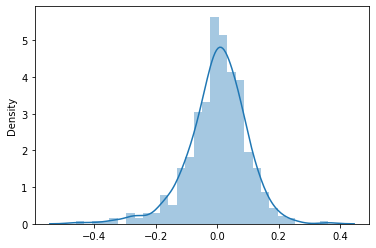

In [675]:
sns.distplot(residual)
plt.show()

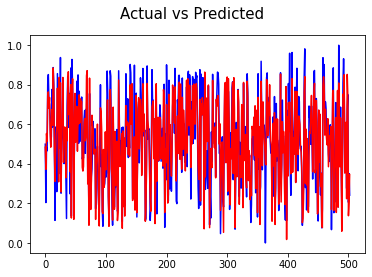

In [676]:
c = [i for i in range(0, len(X_train_6), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_train_predict, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

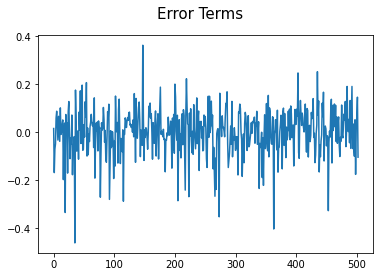

In [677]:
c = [i for i in range(0, len(X_train_6), 1)]
plt.plot(c, residual)
plt.suptitle('Error Terms', fontsize = 15)
plt.show()

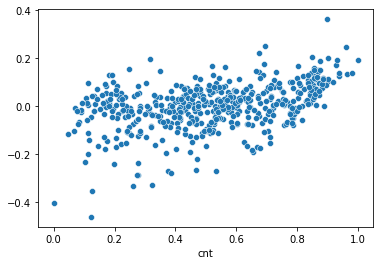

In [678]:
sns.scatterplot(y_train,residual)
plt.show()

## Model Evaluation

In [657]:
bikes_test[num_vars]=scaler.transform(bikes_test[num_vars])
bikes_test.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.565747,0.453460,0.443611,0.521901,0.259259,0.259259,0.231481,0.486111,0.078704,0.074074,0.083333,0.092593,0.097222,0.106481,0.074074,0.083333,0.064815,0.092593,0.069444,0.023148,0.12037,0.134259,0.162037,0.134259,0.148148,0.134259,0.680556,0.032407,0.277778
std,0.237320,0.200070,0.194400,0.207194,0.439246,0.439246,0.422759,0.500968,0.269901,0.262500,0.277027,0.290534,0.296948,0.309169,0.262500,0.277027,0.246771,0.290534,0.254799,0.150723,0.32615,0.341723,0.369341,0.341723,0.356072,0.341723,0.467344,0.177491,0.448944
min,0.047329,-0.004431,0.050663,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363426,0.294042,0.300629,0.382910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.585462,0.428481,0.427217,0.521572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.770316,0.602057,0.550621,0.642142,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.015822,0.984810,1.006307,0.951680,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [696]:
model=model_9
model_columns=X_train_9.columns

In [697]:
bikes_test.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_light,weathersit_misty
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.565747,0.453460,0.443611,0.521901,0.259259,0.259259,0.231481,0.486111,0.078704,0.074074,0.083333,0.092593,0.097222,0.106481,0.074074,0.083333,0.064815,0.092593,0.069444,0.023148,0.12037,0.134259,0.162037,0.134259,0.148148,0.134259,0.680556,0.032407,0.277778
std,0.237320,0.200070,0.194400,0.207194,0.439246,0.439246,0.422759,0.500968,0.269901,0.262500,0.277027,0.290534,0.296948,0.309169,0.262500,0.277027,0.246771,0.290534,0.254799,0.150723,0.32615,0.341723,0.369341,0.341723,0.356072,0.341723,0.467344,0.177491,0.448944
min,0.047329,-0.004431,0.050663,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363426,0.294042,0.300629,0.382910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.585462,0.428481,0.427217,0.521572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.770316,0.602057,0.550621,0.642142,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.015822,0.984810,1.006307,0.951680,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [698]:
model_columns

Index(['temp', 'season_spring', 'season_summer', 'season_winter', 'yr_1',
       'mnth_mar', 'mnth_nov', 'mnth_sept', 'weekday_sat', 'workingday_1',
       'weathersit_light', 'weathersit_misty'],
      dtype='object')

In [699]:
y_test=bikes_test['cnt']
X_test=bikes_test[bikes_test.columns[bikes_test.columns!='cnt']]

In [700]:
X_test_filtered=X_test[model_columns]
y_test_predict=model.predict(sm.add_constant(X_test_filtered))
r2_score(y_test,y_test_predict)

0.8275371720938759

- Model is performing fairly well on test data with accuracy 82.75%

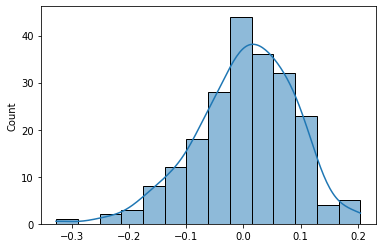

In [701]:
residual=y_test-y_test_predict
sns.histplot(residual,kde=True)
plt.show()

In [702]:
print(residual.describe())

count    216.000000
mean       0.003333
std        0.085980
min       -0.327042
25%       -0.050911
50%        0.007688
75%        0.063642
max        0.204463
dtype: float64


- Residual is following normal distibution with mean arround 0 

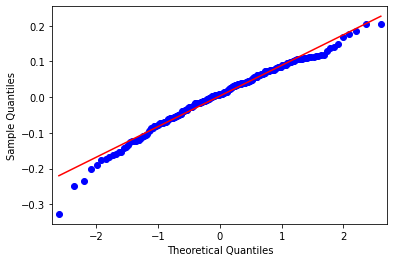

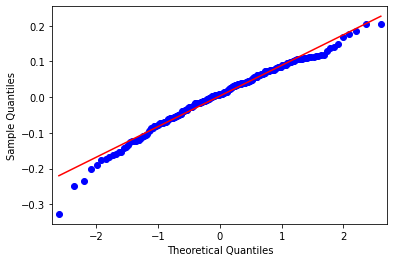

In [703]:
sm.qqplot(residual,line='s')

- qqplot showing point distubuted along y=x line . This confirms residual is following normal distribution 

<AxesSubplot:>

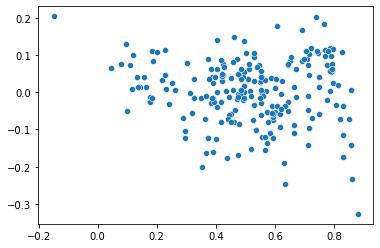

In [704]:
sns.scatterplot(y_test_predict,residual)

In [ ]:
sns.regplot(x=X_test['temp'],y=residual)
plt.show()

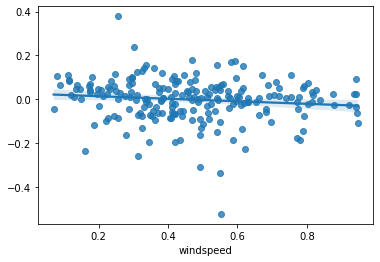

In [364]:
sns.regplot(x=X_test['windspeed'],y=residual)
plt.show()

In [366]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_test_predict)))

0.09853561651198055
